<a href="https://colab.research.google.com/github/Shavrau/AmFatec2025/blob/main/Atividade_participa%C3%A7%C3%A3o_rhian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações de bibliotecas


In [ ]:
!pip install squarify --upgrade
!pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


#Carregamento dos Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
base_credit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/am5s/credit_data.csv")
base_credit.info()

#Analise de anomalia

In [ ]:
np.unique(base_credit['default'], return_counts=True)

In [ ]:
sns.countplot(x=base_credit['default'])

In [ ]:
plt.hist(x=base_credit['age'], edgecolor = 'black')

In [ ]:
plt.hist(x=base_credit['income'], edgecolor = 'black')

In [ ]:
plt.hist(x=base_credit['loan'], edgecolor = 'black')

Observe as anomalias nos graficos de "age", todos os eixos de quadrante negativo

In [ ]:
colors = ['red' if age < 0 else 'blue' for age in base_credit['age']]

plt.scatter(x=base_credit['age'], y=base_credit['income'], edgecolor='black', color=colors)

In [ ]:
base_credit

In [ ]:
grafico_cruzado = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico_cruzado.show()

#Tratamento de anomalias

In [ ]:
base_credit.mean()

In [ ]:
base_credit['age'].mean()

In [ ]:
ageMedia = base_credit['age'][base_credit['age'] > 0].mean()
base_credit.loc[base_credit['age'] < 0, 'age'] = base_credit['age'].mean()

In [ ]:
base_credit.isnull()

In [ ]:
base_credit.isnull().sum()

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

In [ ]:
base_credit.loc[base_credit['age'].isnull(), 'age'] = base_credit['age'].mean()

In [ ]:
base_credit.info()

In [ ]:
# prompt: Usando o DataFrame base_credit: quero grafcos que criem visualizações semelhantes a esta mas com outras visualizações
# grafico_cruzado = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
# grafico_cruzado.show()

import plotly.express as px

# Scatter matrix plot
grafico_cruzado = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico_cruzado.show()

# Parallel coordinates plot
grafico_paralelo = px.parallel_coordinates(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico_paralelo.show()


# Parallel categories plot
grafico_paralelo_categorias = px.parallel_categories(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico_paralelo_categorias.show()

# 3D scatter plot
grafico_3d = px.scatter_3d(base_credit, x='age', y='income', z='loan', color='default')
grafico_3d.show()

# Density heatmap
grafico_heatmap = px.density_heatmap(base_credit, x='age', y='income', z='loan', marginal_x='histogram', marginal_y='histogram')
grafico_heatmap.show()

# Box plots
grafico_box_age = px.box(base_credit, x="default", y="age", color="default")
grafico_box_age.show()

grafico_box_income = px.box(base_credit, x="default", y="income", color="default")
grafico_box_income.show()

grafico_box_loan = px.box(base_credit, x="default", y="loan", color="default")
grafico_box_loan.show()


#Analises estatisticas



In [ ]:
estatisticas = base_credit.describe()
print(estatisticas)

In [ ]:
def detectar_outliers(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = coluna[(coluna < limite_inferior) | (coluna > limite_superior)]
    return outliers

# Aplicar a função para cada variável numérica
print("\nOutliers Detectados:")
print("=" * 50)
for coluna in ['income', 'age', 'loan']:
    outliers = detectar_outliers(base_credit[coluna])
    print(f"Outliers em '{coluna}': {len(outliers)}")
    print(outliers)
    print("-" * 30)

In [ ]:
# Criar histogramas para visualizar as distribuições
plt.figure(figsize=(15, 5))

# Histograma para 'income'
plt.subplot(1, 3, 1)
sns.histplot(base_credit['income'], kde=True, color='blue')
plt.title('Distribuição de Income')
plt.xlabel('Income')
plt.ylabel('Frequência')

# Histograma para 'age'
plt.subplot(1, 3, 2)
sns.histplot(base_credit['age'], kde=True, color='green')
plt.title('Distribuição de Age')
plt.xlabel('Age')
plt.ylabel('Frequência')

# Histograma para 'loan'
plt.subplot(1, 3, 3)
sns.histplot(base_credit['loan'], kde=True, color='red')
plt.title('Distribuição de Loan')
plt.xlabel('Loan')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
# Calcular e interpretar a assimetria das variáveis
print("\nAnálise de Assimetria:")
print("=" * 50)
for coluna in ['income', 'age', 'loan']:
    skewness = base_credit[coluna].skew()
    print(f"Assimetria de '{coluna}': {skewness:.2f}")
    if skewness > 0:
        print(f"'{coluna}' tem distribuição assimétrica à direita (positiva).")
    elif skewness < 0:
        print(f"'{coluna}' tem distribuição assimétrica à esquerda (negativa).")
    else:
        print(f"'{coluna}' tem distribuição simétrica.")
    print("-" * 30)

### Insights Gerais da Análise Estatística

1. **Outliers**:
   - **Renda (`income`) e Idade (`age`)**:
     - Não foram detectados outliers nessas variáveis, o que indica que os dados estão bem distribuídos sem valores extremos.
   - **Empréstimo (`loan`)**:
     - Foram detectados **5 outliers** na variável `loan`, com valores acima de **13.000**. Esses valores podem representar empréstimos excepcionalmente altos e merecem uma análise mais detalhada para entender seu impacto.

3. **Assimetria das Distribuições**:
   - **Renda e Idade (`income & age`)**:
     - Ambos apresentam uma leve assimetria à esquerda (negativa). Isso significa que há uma concentração de clientes com renda ligeiramente acima da média. e que a idade é quase simetrica
   - **Empréstimo (`loan`)**:
     - A assimetria é **0,62**, indicando uma assimetria à direita (positiva). Isso significa que há com alguns clientes tem empréstimos significativamente maiores que a maioria, como pode ser observado no historgrama.

4. **Implicações**:
   - A ausência de outliers em `income` e `age` sugere que essas variáveis estão bem comportadas e não exigem tratamentos especiais.
   - Os outliers em `loan` podem indicar clientes com necessidades financeiras excepcionais. É importante verificar se esses valores são legítimos ou se há erros de entrada.
   - A assimetria à direita em `loan` sugere que a maioria dos clientes tem empréstimos menores, mas alguns têm valores muito altos. Isso pode impactar modelos de machine learning, e uma transformação (como logarítmica) pode ser útil para normalizar a distribuição.


#Correlação Entre Variáveis

In [ ]:
correlacao = base_credit[['income', 'age', 'loan', 'default']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlação')
plt.show()

#### Insights:
- **Idade (`age`)** e **Empréstimo (`loan`)** são as variáveis que mais impactam o risco de crédito (`default`).
  - Clientes mais jovens (`age`) têm maior probabilidade de inadimplência.
  - Clientes com empréstimos maiores (`loan`) também apresentam maior risco de inadimplência.
- A **renda (`income`)** não parece influenciar diretamente o risco de crédito, mas está relacionada ao valor do empréstimo solicitado.

#Distribuição de Clientes Aprovados e Negados



In [ ]:
# Contar a quantidade de clientes aprovados e negados
contagem_default = base_credit['default'].value_counts()

# Gráfico de barras (corrigido)
plt.figure(figsize=(8, 5))
sns.barplot(x=contagem_default.index, y=contagem_default.values, hue=contagem_default.index, palette='viridis', legend=False)
plt.title('Proporção de Clientes Aprovados e Negados', fontsize=16)
plt.xlabel('Default (0 = Aprovado, 1 = Negado)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Aprovados', 'Negados'])
plt.show()

In [ ]:
# Boxplot de renda por status de aprovação
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='income', data=base_credit, hue='default', palette='Set2', legend=False)
plt.title('Distribuição de Renda por Status de Aprovação', fontsize=16)
plt.xlabel('Default (0 = Aprovado, 1 = Negado)', fontsize=12)
plt.ylabel('Renda (Income)', fontsize=12)
plt.xticks([0, 1], ['Aprovados', 'Negados'])
plt.show()

In [ ]:
# Boxplot de idade por status de aprovação
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='loan', data=base_credit, hue='default', palette='Set3', legend=False)
plt.title('Distribuição de Idade por Status de Aprovação', fontsize=16)
plt.xlabel('Default (0 = Aprovado, 1 = Negado)', fontsize=12)
plt.ylabel('Divida (loan)', fontsize=12)
plt.xticks([0, 1], ['Aprovados', 'Negados'])
plt.show()

### Análise da Distribuição de Clientes Aprovados e Negados

 **Fatores que Influenciam a Decisão**:
   - **Renda (`income`)**:
     - A renda média dos clientes aprovados e negados é semelhante, indicando que a renda **não é um fator decisivo** para a aprovação.
   - **Idade (`age`)**:
     - Clientes **negados** tendem a ser mais **jovens** do que os aprovados. Isso sugere que a idade é um fator importante na decisão, com clientes mais jovens tendo maior risco de inadimplência.
   - **Empréstimo (`loan`)**:
     - Clientes **negados** tendem a ter **empréstimos maiores** do que os aprovados. Isso indica que valores mais altos de empréstimo estão associados a um maior risco de inadimplência.

# Relação entre Idade e Aprovação de Crédito

In [ ]:
# Boxplot de idade por status de aprovação
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='age', data=base_credit, hue='default', palette='Set2', legend=False)
plt.title('Distribuição de Idade por Status de Aprovação', fontsize=16)
plt.xlabel('Default (0 = Aprovado, 1 = Negado)', fontsize=12)
plt.ylabel('Idade (Age)', fontsize=12)
plt.xticks([0, 1], ['Aprovados', 'Negados'])
plt.show()

In [ ]:
# Dados gerados pelo código fornecido
faixas_etarias = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 40, 50, 60, 70]
base_credit['faixa_etaria'] = pd.cut(base_credit['age'], bins=faixas_etarias, right=False)

# Calcular a taxa de aprovação por faixa etária
aprovacao_por_faixa = base_credit.groupby('faixa_etaria')['default'].apply(lambda x: (x == 0).mean() * 100).reset_index()
aprovacao_por_faixa.columns = ['faixa_etaria', 'taxa_aprovacao_percentual']

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='faixa_etaria', y='taxa_aprovacao_percentual', data=aprovacao_por_faixa, palette='viridis')
plt.title('Taxa de Aprovação por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Taxa de Aprovação (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar rótulos do eixo X para melhor visualização
plt.ylim(0, 110)  # Ajustar o eixo Y para incluir 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar linhas de grade no eixo Y
plt.show()

### Análise da Relação entre Idade e Aprovação de Crédito

 **Distribuição de Idade por Status de Aprovação**:
   - Clientes **negados** tendem a ser mais **jovens** do que os aprovados. Isso é evidenciado pelo boxplot, onde a mediana de idade dos negados é menor que a dos aprovados.
   - A taxa de aprovação é mais baixa para clientes na faixa etária de **18-30 anos**, sugerindo que jovens têm maior dificuldade para obter crédito.
   - À medida que a idade aumenta, a taxa de aprovação também aumenta, com a faixa de **60+ anos** tendo a maior taxa de aprovação

#Impacto da Renda no Score de Crédito

In [ ]:
# Scatter plot entre renda (income) e empréstimo (loan)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='loan', data=base_credit, hue='default', palette='coolwarm', alpha=0.7)
plt.title('Relação entre Renda e Empréstimo', fontsize=16)
plt.xlabel('Renda (Income)', fontsize=12)
plt.ylabel('Empréstimo (Loan)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Histograma de endividamento por default
plt.figure(figsize=(10, 6))
sns.histplot(data=base_credit, x='endividamento', hue='default', multiple='dodge', shrink=.8, palette='viridis')
plt.title('Distribuição de Endividamento por Status de Inadimplência', fontsize=16)
plt.xlabel('Endividamento (% da Renda)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(title='Default', labels=['Aprovados (0)', 'Negados (1)'])
plt.show()

In [ ]:
# Scatter plot de income vs. age, colorido por default
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='age', data=base_credit, hue='default', palette='coolwarm', alpha=0.7)
plt.title('Relação entre Renda, Idade e Inadimplência', fontsize=16)
plt.xlabel('Renda (Income)', fontsize=12)
plt.ylabel('Idade (Age)', fontsize=12)
plt.legend(title='Default', loc='upper right')
plt.grid(True)
plt.show()

### Análise da Relação entre Renda e Empréstimo

1. **Relação Positiva entre Renda e Empréstimo**:
   - O scatter plot mostra uma **tendência crescente** entre renda (`income`) e valor do empréstimo (`loan`). Isso indica que **clientes com maior renda tendem a solicitar empréstimos maiores**.

2. **Inadimplência e Valores de Empréstimo**:
   - Os pontos vermelhos (`default = 1`, clientes inadimplentes) estão **distribuídos entre os valores mais altos de cada faixa de renda**. Isso sugere que:
     - **O valor do empréstimo é um fator de risco**: Mesmo dentro de uma mesma faixa de renda, clientes que solicitam empréstimos maiores têm maior probabilidade de inadimplência.

#Endividamento e Score de Crédito

In [ ]:
sns.histplot(data=base_credit, x='loan', hue='default', multiple='dodge', shrink=.8, palette='coolwarm')
plt.title('Distribuição de Empréstimos por Status de Inadimplência', fontsize=16)
plt.xlabel('Valor do Empréstimo (Loan)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(title='Default', labels=['Aprovados (0)', 'Negados (1)'])
plt.show()


#Conclusões e Recomendações para Modelagem



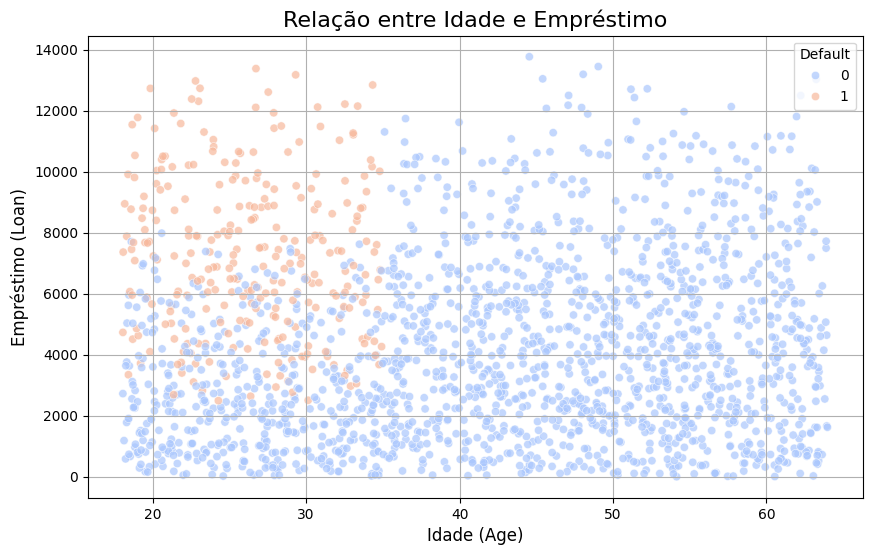

In [ ]:
# Scatter plot de age vs. loan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='loan', data=base_credit, hue='default', palette='coolwarm', alpha=0.7)
plt.title('Relação entre Idade e Empréstimo', fontsize=16)
plt.xlabel('Idade (Age)', fontsize=12)
plt.ylabel('Empréstimo (Loan)', fontsize=12)
plt.legend(title='Default', loc='upper right')
plt.grid(True)
plt.show()

### Conclusões e Recomendações para Modelagem
#### Variáveis Relevantes para o Modelo:

1. **Idade (`age`)**:
   - Clientes mais jovens têm maior probabilidade de inadimplência.
   - Deve ser incluída no modelo.

2. **Renda (`income`)**:
   - Embora não tenha correlação direta com a inadimplência, está relacionada ao valor do empréstimo.
   - Útil para calcular métricas como **endividamento**.

3. **Valor do Empréstimo (`loan`)**:
   - Clientes com empréstimos maiores têm maior probabilidade de inadimplência.
   - Fator de risco importante.

4. **Endividamento (`endividamento`)**:
   - Feature derivada (`loan / income * 100`).
   - Captura o risco relativo ao nível de renda.
#### Engenharia de Features:

1. **Criação de Novas Features**:
   - **Endividamento**: `loan / income * 100`.
   - **Faixas Etárias**: Criar faixas como 18-30, 30-40, 40-50, 50+.
   - **Faixas de Renda**: Dividir a renda em faixas (ex.: 20-30k, 30-40k).


#### Tratamento de Dados:

1. **Tratamento de Outliers**:
  - Identificar a origem dos outliers detectados anteriormente e se necessario fazer o tratamento deles.